In [82]:
# -*- coding: UTF-8 -*-
import jieba
import logging
import codecs
import traceback
import gensim
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import re 


In [83]:
# 导入停用词的路径
stopwords_path= "utils/stop_words.txt"
# 逐个读取停用词，并返回
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='UTF-8').readlines()]
    return stopwords


In [84]:
'''
对电影内容进行停用词语处理
'''
def seg_words_content(sentence):
    # 对导入函数的文档，先进行分词
    sentence_seged = jieba.cut(sentence.strip())
    # print("sentence_seged:",sentence_seged)
    # 这里加载停用词的路径
    stopwords = stopwordslist(stopwords_path)  
    # 处理之后的内容存储于outstr变量 
    outstr = ''  # 返回值是字符串
    for word in sentence_seged:
        if word not in stopwords:
            # print(word)
            if word != '\t':
                outstr += word
                outstr += ""
    return outstr
'''
对电影名称进行停用词语处理
'''
def seg_words_title(sentence):
    # 对导入函数的文档，先进行分词
    # sentence_seged = jieba.cut(sentence.strip())
    # print("sentence_seged:",sentence_seged)
    # 这里加载停用词的路径
    stopwords = stopwordslist(stopwords_path)  
    # 处理之后的内容存储于outstr变量 
    outstr = ''  # 返回值是字符串
    for word in sentence:
        if word not in stopwords:
            if word not in stopwords:
                outstr += word
                outstr += ""
    return outstr

In [85]:
# 加载用户词典
def load_userdictfile(dict_file):
    jieba.load_userdict(dict_file)

'''
读取文本数据数据，该数据每行为1个文档 
【文本特征处理】
------------------------------
去除空格
'''

def load_processfile(process_file):
    # 语料库变量
    corpus_list = []
    try:
        fp = open(process_file, "r", encoding='UTF-8')
        for line in fp:
            conline = line.strip()
            conline= conline.replace(u"\u3000",u"")
            conline = conline.replace("\n","").replace("  ","")
            corpus_list.append(conline)
            
        fp.close()
        print("处理文本数据文件成功")
        return True, corpus_list
    except:
        logging.error(traceback.format_exc())
        return False, "处理文本数据文件失败"

In [86]:
'''
获取标题和分词
'''
# sen_seg_list 存储每个电影对应的内容
sen_seg_list = []
# title_list 存储 电影名称
title_list = [] 
# lines 里面存储所有内容
flag, lines = load_processfile("data/all_content_corpus.txt")


处理文本数据文件成功


In [87]:
if flag == False:
    logging.error("加载数据集失败")
    print("加载数据集失败")
for line in lines:
    # 更改title
    title_list.append(line.split(',')[0])#文档名称
    #title_list.append(seg_words_title(line))#文档名称
    sen_seg_list.append(seg_words_content(line.split(',')[1]))#电影内容，分词处理 存储保存

In [88]:
'''
存储分词文本（不含标题）
'''
def output_file(out_file, sen_seg_list):
    try:
        data1 = codecs.open(out_file, 'w', encoding='UTF-8')
        for num in range(len(sen_seg_list)):
            if num == len(sen_seg_list) - 1:
                data1.write(sen_seg_list[num])
            else:
                data1.write(sen_seg_list[num] + '\r\n')
        data1.close()
    except:
        logging.error(traceback.format_exc())
        return False, "保存分词后数据集文件失败"

In [89]:
# doc2vec提取特征
sentences = gensim.models.doc2vec.TaggedLineDocument("utils/data2tag.txt")  #读取分词后的文件

if not os.path.exists("utils/Doc2Vectag.pkl"):
    # 存储分词文本(不含标题)
    if not os.path.exists("utils/data2tag.txt"):
        output_file("utils/data2tag.txt", sen_seg_list)
        print("success output")

In [90]:
# doc2vec提取特征
sentences = gensim.models.doc2vec.TaggedLineDocument("utils/data2tag.txt")  #读取分词后的文件

if not os.path.exists("utils/Doc2Vectag.pkl"):
    # doc2vec提取特征
    # 训练并保存模型
    model = gensim.models.Doc2Vec(sentences, vector_size=100, window=2, min_count=3)#构建Doc2vec模型
    model.train(sentences, total_examples=model.corpus_count, epochs=1000)#训练模型
    model.save("utils/Doc2Vectag.pkl")#保存模型

In [91]:
for text, label in sentences:
    pass
    # print(text) --内容
    # print(label) (0,249)

In [92]:
infered_vectors_list = []
print("加载模型...")
model_dm = gensim.models.Doc2Vec.load("utils/Doc2Vectag.pkl")
print("读取训练集的文档向量...")
i = 0
for text, label in sentences:
    # 为给定的批量训练文档推断向量。
    vector = model_dm.infer_vector(text)
    infered_vectors_list.append(vector)
    i += 1
infered_vectors_list


加载模型...
读取训练集的文档向量...


[array([-0.4908606 , -0.6772149 , -3.1198916 , -0.39764512,  0.7079773 ,
        -0.84255683,  0.5902475 ,  0.976605  , -0.8229674 , -0.999711  ,
         0.18971579, -4.313589  , -1.7727883 ,  0.6115035 , -0.7265743 ,
        -1.9168116 ,  3.2665904 , -0.80927885, -0.02918732, -4.529173  ,
        -0.35085666,  2.267343  ,  3.645771  ,  0.83771473,  0.5053083 ,
        -1.8741789 , -5.1905336 ,  0.13905375, -1.164006  , -2.0550995 ,
         2.798417  , -1.0045888 , -0.1941169 , -0.13188262, -0.05047163,
         0.12256874,  0.04227167, -4.5183134 ,  0.09870046,  0.6563161 ,
        -0.94365805, -2.61329   ,  0.8020532 , -3.8574538 ,  0.16792779,
        -0.77092195, -1.3463671 ,  2.3148854 , -0.6285454 ,  3.0177965 ,
        -1.7415488 ,  0.11602714, -0.5935854 , -3.507885  ,  2.3065257 ,
         1.7895031 , -0.05306146, -1.1985898 , -2.478939  ,  0.08056142,
        -4.101666  ,  1.5345622 , -1.3974851 , -0.07732741, -0.29575723,
         2.2575417 ,  0.7599637 ,  3.3516982 ,  0.1

In [93]:
# 评价算法好坏
def evaluation(tfidf_matrix):
    # ### 三者选其一，SSE较好、但需要看拐点，【轮廓系数法】比较方便
    # 方法一：'利用SSE选择k（手肘法）'
    SSE = []  # 存放每次结果的误差平方和
    for k in range(3, 25):
        km = KMeans(n_clusters=k)  # 构造聚类器
        km.fit(tfidf_matrix)
        SSE.append(km.inertia_)
    
    X = range(3, 25)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.plot(X, SSE, 'o-')
    plt.show()

    # 方法二：利用轮廓系数法选择k
    Scores = []  # 存放轮廓系数
    for k in range(3, 25):
        km = KMeans(n_clusters=k)  # 构造聚类器
        km.fit(tfidf_matrix)
        Scores.append(metrics.silhouette_score(tfidf_matrix, km.labels_, metric='euclidean'))

    X = range(3, 25)
    plt.xlabel('k')
    plt.ylabel('轮廓系数')
    plt.plot(X, Scores, 'o-')
    plt.show()
   

    # 求最优k值
    print(SSE)
    k_SSE = 3 + (SSE.index(max(SSE)))

    # 求最优k值
    print(Scores)
    k_Scores = 3 + (Scores.index(max(Scores)))

    return k_SSE,k_Scores

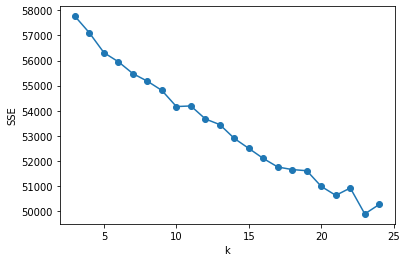

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36718 missing from c

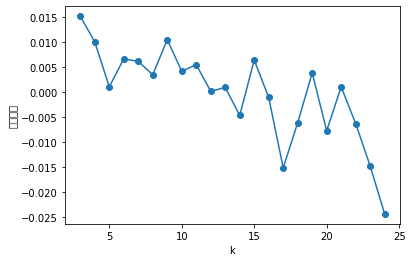

[57766.400544145945, 57103.429578345196, 56313.505090514154, 55950.1644710789, 55478.54070037554, 55175.926939238954, 54808.09395098158, 54164.60370641624, 54188.911642707964, 53670.176376729345, 53443.92880787893, 52892.442992644465, 52494.32731267369, 52093.63177799515, 51753.41937135367, 51651.3363041211, 51605.36393671702, 50977.74162998054, 50622.97841770123, 50917.43379740449, 49883.07931376842, 50262.11736493299]
[0.015115481, 0.009989979, 0.0010327339, 0.0066268877, 0.006101759, 0.0034529194, 0.010447035, 0.0041397754, 0.005454047, 0.00014128184, 0.0009126207, -0.004664093, 0.0063869306, -0.0010851593, -0.015118799, -0.006123454, 0.0038144544, -0.0077229585, 0.0010266418, -0.006278556, -0.014749167, -0.024306266]


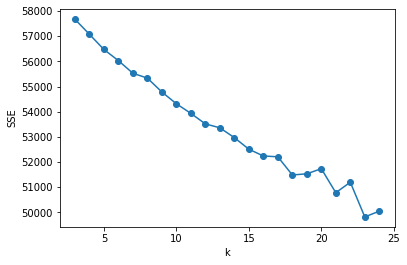

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36718 missing from c

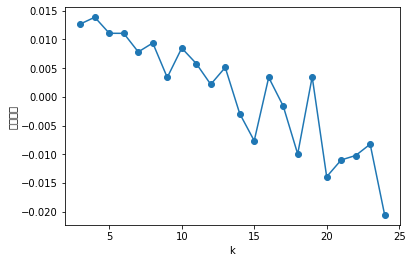

[57678.785499676305, 57081.380014339054, 56477.08268169571, 56034.01667437753, 55531.550783358965, 55339.30047054171, 54787.504660647035, 54320.82656841322, 53937.05966178981, 53520.32363010684, 53364.888149008824, 52974.47620279975, 52514.67369593455, 52244.950523072075, 52213.033812026675, 51490.25028913368, 51536.26707470722, 51739.80945292104, 50786.1220403983, 51202.32451016452, 49823.41952217389, 50052.28486620681]
[0.012686183, 0.013861258, 0.011068802, 0.011056043, 0.007817776, 0.009379619, 0.0033715777, 0.008490573, 0.005796961, 0.002167178, 0.0051168725, -0.0029292372, -0.0076562273, 0.0033796963, -0.0016000115, -0.009960694, 0.003477331, -0.013922916, -0.010999271, -0.010223581, -0.00825176, -0.020572279]


In [94]:
k_Scores = evaluation(infered_vectors_list)
k_SSE = evaluation(infered_vectors_list)

In [95]:
k_Scores

(3, 3)

In [96]:
k_SSE

(3, 4)

In [97]:
# Kmeans,大数据量下用Mini-Batch-KMeans算法 离簇中心最近进行聚类
km = KMeans(n_clusters=k)

# 可直接用模型
# km.fit(model.docvecs)
km.fit(infered_vectors_list)
print(Counter(km.labels_))  # 打印每个类别多少个
# print(km.cluster_centers_)   # 中心点

Counter({1: 90, 2: 85, 0: 75})


In [98]:
# 存储每个样本所属的簇
clusterRes = codecs.open("utils/cluster_dockmResulttag01.txt", 'w', encoding='UTF-8')
count = 1
while count <= len(km.labels_):
    clusterRes.write(str(title_list[count - 1]) + '\t' + str(km.labels_[count - 1]))
    clusterRes.write('\r\n')
    count = count + 1
clusterRes.close()
